<a href="https://colab.research.google.com/github/Anni1123/MachineLearning/blob/master/Sound_Related.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import glob
import os
import pandas as pd
import librosa
text_files = glob.glob('/content/101_1b1_Al_sc_Meditron - Copy*.txt')

def get_file_metadata(file_name):
    file_name = file_name.split('/')[-1].replace('.txt', '')
    patient_number, recording_index, chest_location, acquisition_mode, recording_equipment = file_name.split('_')
    return (patient_number, recording_index, chest_location, acquisition_mode, recording_equipment, file_name)


# for text_file in text_files:
#     text_file = text_file.split('/')[-1].replace('.txt', '')
#     patient_number, recording_index, chest_location, acquisition_mode, recording_equipment = text_file.split('_')

files_metadata = [get_file_metadata(file_name) for file_name in text_files]
metadata_df = pd.DataFrame(files_metadata, columns = ['patient_number', 'recording_index', 'chest_location', 'acquisition_mode', 'recording_equipment', 'file_name'])

metadata_df.sort_values('patient_number', inplace=True)
metadata_df['patient_number'] = metadata_df['patient_number'].astype(int)
metadata_df.head()


Empty DataFrame
Columns: [patient_number, recording_index, chest_location, acquisition_mode, recording_equipment, file_name]
Index: []

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/My Drive/Sound/Respiratory_Sound_Database'):
    for filename in filenames:
        print(os.path.join(dirname, filename))  

/content/drive/My Drive/Sound/Respiratory_Sound_Database/patient_diagnosis.csv
/content/drive/My Drive/Sound/Respiratory_Sound_Database/filename_differences.txt
/content/drive/My Drive/Sound/Respiratory_Sound_Database/filename_format.txt
/content/drive/My Drive/Sound/Respiratory_Sound_Database/demographic_info.txt
/content/drive/My Drive/Sound/Respiratory_Sound_Database/audio_and_txt_files/160_1b3_Al_mc_AKGC417L.wav
/content/drive/My Drive/Sound/Respiratory_Sound_Database/audio_and_txt_files/160_1b3_Ar_mc_AKGC417L.wav
/content/drive/My Drive/Sound/Respiratory_Sound_Database/audio_and_txt_files/160_1b3_Lr_mc_AKGC417L.wav
/content/drive/My Drive/Sound/Respiratory_Sound_Database/audio_and_txt_files/160_1b3_Lr_mc_AKGC417L.txt
/content/drive/My Drive/Sound/Respiratory_Sound_Database/audio_and_txt_files/160_1b3_Tc_mc_AKGC417L.wav
/content/drive/My Drive/Sound/Respiratory_Sound_Database/audio_and_txt_files/160_1b3_Pr_mc_AKGC417L.txt
/content/drive/My Drive/Sound/Respiratory_Sound_Database/aud

In [ ]:
import librosa
import numpy as np
import pandas as pd
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np
import glob
from scipy.io.wavfile import read

In [ ]:
audio_path = '/content/drive/My Drive/Sound/Respiratory_Sound_Database/audio_and_txt_files'
audio_file = '/content/drive/My Drive/Sound/Respiratory_Sound_Database/audio_and_txt_files/162_1b2_Ar_mc_AKGC417L.wav'
demographic_info = '/content/drive/My Drive/Sound/Respiratory_Sound_Database/demographic_info.txt'
diagnosis_file = '/content/drive/My Drive/Sound/Respiratory_Sound_Database/patient_diagnosis.csv'

In [ ]:
text_files = glob.glob('/content/drive/My Drive/Sound/Respiratory_Sound_Database/audio_and_txt_files/*.txt')

In [ ]:
def get_file_metadata(file_name):
    file_name = file_name.split('/')[-1].replace('.txt', '')
    patient_number, recording_index, chest_location, acquisition_mode, recording_equipment = file_name.split('_')
    return (patient_number, recording_index, chest_location, acquisition_mode, recording_equipment, file_name)

def get_spectogram(audio_file):
    time_series, sample_rate = librosa.load(audio_file)
    stft = np.abs(librosa.stft(time_series, hop_length=512, n_fft=2048*4))
    return librosa.amplitude_to_db(stft, ref=np.max)

for text_file in text_files:
    text_file = text_file.split('/')[-1].replace('.txt', '')
    patient_number, recording_index, chest_location, acquisition_mode, recording_equipment = text_file.split('_')
    #print((patient_number, recording_index, chest_location, acquisition_mode, recording_equipment))
    
files_metadata = [get_file_metadata(file_name) for file_name in text_files]

metadata_df = pd.DataFrame(files_metadata, columns = ['patient_number', 'recording_index', 'chest_location', 'acquisition_mode', 'recording_equipment', 'file_name'])

metadata_df.sort_values('patient_number', inplace=True)
metadata_df['patient_number'] = metadata_df['patient_number'].astype(int)

metadata_df.head()

patient_number  ...                      file_name
500             101  ...         101_1b1_Pr_sc_Meditron
501             101  ...         101_1b1_Al_sc_Meditron
502             101  ...  101_1b1_Al_sc_Meditron - Copy
503             102  ...         102_1b1_Ar_sc_Meditron
504             103  ...         103_2b2_Ar_mc_LittC2SE

[5 rows x 6 columns]

In [ ]:
metadata_df.shape


(921, 6)

In [ ]:
for equipment in metadata_df['recording_equipment'].unique():
    locations = np.sort(metadata_df.loc[metadata_df['recording_equipment'] == 'Meditron']['chest_location'].unique())
    print(f"{equipment}: {locations}")

Meditron: ['Al' 'Ar' 'Ll' 'Lr' 'Pl' 'Pr' 'Tc']
Meditron - Copy: ['Al' 'Ar' 'Ll' 'Lr' 'Pl' 'Pr' 'Tc']
LittC2SE: ['Al' 'Ar' 'Ll' 'Lr' 'Pl' 'Pr' 'Tc']
Litt3200: ['Al' 'Ar' 'Ll' 'Lr' 'Pl' 'Pr' 'Tc']
AKGC417L: ['Al' 'Ar' 'Ll' 'Lr' 'Pl' 'Pr' 'Tc']


In [ ]:
equipment_distribution_df = metadata_df.groupby('recording_equipment').count()
equipment_distribution_df = equipment_distribution_df.rename(columns = {'patient_number': 'count'})[['count']]
equipment_distribution_df.reset_index(inplace=True)
equipment_distribution_df

recording_equipment  count
0            AKGC417L    646
1            Litt3200     60
2            LittC2SE     87
3            Meditron    127
4     Meditron - Copy      1

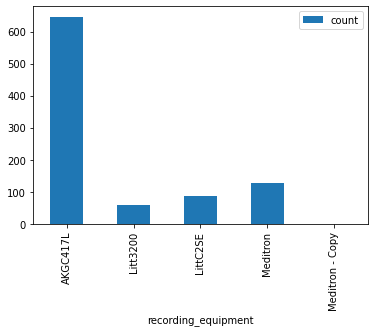

In [ ]:
equipment_distribution_df.plot(kind='bar', x='recording_equipment', y='count');


In [ ]:
demographic_columns = [
    'patient_number',
    'age',
    'sex',
    'adult_bmi',
    'child_weight',
    'child_height'
]
demographic_df = pd.read_csv(demographic_info, header=None, delimiter=' ')
demographic_df.columns = demographic_columns
demographic_df['age'].fillna(demographic_df['age'].median(), inplace=True)
demographic_df['age_group'] = demographic_df['age'].apply(lambda n: int(n/10)*10)
print(demographic_df.shape)
demographic_df.head()

(126, 7)


patient_number    age sex  adult_bmi  child_weight  child_height  age_group
0             101   3.00   F        NaN          19.0          99.0          0
1             102   0.75   F        NaN           9.8          73.0          0
2             103  70.00   F      33.00           NaN           NaN         70
3             104  70.00   F      28.47           NaN           NaN         70
4             105   7.00   F        NaN          32.0         135.0          0

In [ ]:
diagnosis_df = pd.read_csv(diagnosis_file, header=None)
diagnosis_df.columns = ['patient_number', 'diagnosis']
print(diagnosis_df.shape)
diagnosis_df.head()

(126, 2)


patient_number diagnosis
0             101      URTI
1             102   Healthy
2             103    Asthma
3             104      COPD
4             105      URTI

In [ ]:
diagnosis_df.loc[diagnosis_df['patient_number']==218]


patient_number diagnosis
117             218      COPD

In [ ]:
demographic_diagnosis_df = pd.merge(demographic_df, diagnosis_df)
print(demographic_diagnosis_df.shape)
demographic_diagnosis_df.head()


(126, 8)


patient_number    age sex  ...  child_height  age_group  diagnosis
0             101   3.00   F  ...          99.0          0       URTI
1             102   0.75   F  ...          73.0          0    Healthy
2             103  70.00   F  ...           NaN         70     Asthma
3             104  70.00   F  ...           NaN         70       COPD
4             105   7.00   F  ...         135.0          0       URTI

[5 rows x 8 columns]

In [ ]:
metadata_df[['patient_number', 'recording_equipment']].drop_duplicates()


patient_number recording_equipment
500             101            Meditron
502             101     Meditron - Copy
503             102            Meditron
504             103            LittC2SE
507             104            Litt3200
..              ...                 ...
488             223            Meditron
497             224            Meditron
495             225            Meditron
492             226            LittC2SE
493             226            Meditron

[131 rows x 2 columns]

In [ ]:
df = metadata_df[['patient_number', 'recording_equipment']].drop_duplicates().groupby('patient_number').count()
multiple_equipments = df.loc[df['recording_equipment']>1].index.values
multiple_equipments_df = metadata_df.loc[metadata_df['patient_number'].isin(multiple_equipments)]
multiple_equipments_df = multiple_equipments_df.groupby(['patient_number', 'chest_location']).count()[['recording_index']].rename(columns = {'recording_index':'count'})
multiple_equipments_df.reset_index(inplace=True)
multiple_equipments_df = multiple_equipments_df.loc[multiple_equipments_df['count'] > 1]
multiple_equipments_df['patient_number'] = multiple_equipments_df['patient_number'].astype(int)
multiple_equipments_df

patient_number chest_location  count
0              101             Al      2
7              158             Al      3
8              158             Ar      5
9              158             Ll      2
10             158             Lr      4
11             158             Pl      3
12             158             Pr      3
13             158             Tc      4
15             218             Ar      2
17             218             Pl      2
18             218             Pr      2

In [ ]:
metadata_df.loc[(metadata_df['patient_number']==158) & (metadata_df['chest_location']=='Lr')]

patient_number recording_index  ... recording_equipment               file_name
902             158             1p4  ...            AKGC417L  158_1p4_Lr_mc_AKGC417L
908             158             2p3  ...            AKGC417L  158_2p3_Lr_mc_AKGC417L
895             158             1p3  ...            AKGC417L  158_1p3_Lr_mc_AKGC417L
893             158             1p2  ...            AKGC417L  158_1p2_Lr_mc_AKGC417L

[4 rows x 6 columns]

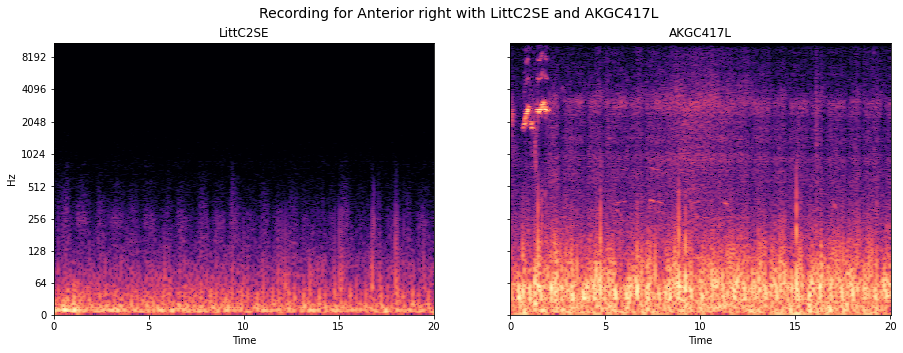

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(15, 5))

librosa.display.specshow(get_spectogram(f'{audio_path}/158_1b3_Ar_mc_LittC2SE.wav'),
                         y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='LittC2SE')
ax[0].label_outer()

librosa.display.specshow(get_spectogram(f'{audio_path}/158_2p2_Ar_mc_AKGC417L.wav'),
                         y_axis='log', x_axis='time', ax=ax[1])

ax[1].set(title='AKGC417L')
ax[1].label_outer();
plt.suptitle("Recording for Anterior right with LittC2SE and AKGC417L", fontsize=14);

In [ ]:
spectogram = get_spectogram(f'{audio_path}/158_1b3_Ar_mc_LittC2SE.wav')
spectogram.shape

(4097, 862)

In [ ]:
multiple_equipments_df


patient_number chest_location  count
0              101             Al      2
7              158             Al      3
8              158             Ar      5
9              158             Ll      2
10             158             Lr      4
11             158             Pl      3
12             158             Pr      3
13             158             Tc      4
15             218             Ar      2
17             218             Pl      2
18             218             Pr      2

In [ ]:
metadata_df.loc[(metadata_df['patient_number']==218) & (metadata_df['chest_location']=='Ar')]


patient_number recording_index  ... recording_equipment               file_name
467             218             1b1  ...            Meditron  218_1b1_Ar_sc_Meditron
461             218             1p1  ...            Litt3200  218_1p1_Ar_sc_Litt3200

[2 rows x 6 columns]

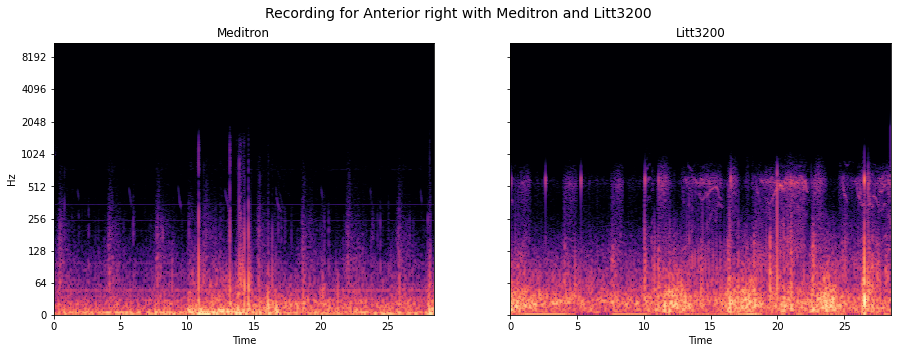

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(15, 5))

librosa.display.specshow(get_spectogram(f'{audio_path}/218_1b1_Ar_sc_Meditron.wav'),
                         y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Meditron')
ax[0].label_outer()

librosa.display.specshow(get_spectogram(f'{audio_path}/218_1p1_Ar_sc_Litt3200.wav'),
                         y_axis='log', x_axis='time', ax=ax[1])

ax[1].set(title='Litt3200')
ax[1].label_outer();
plt.suptitle("Recording for Anterior right with Meditron and Litt3200", fontsize=14);

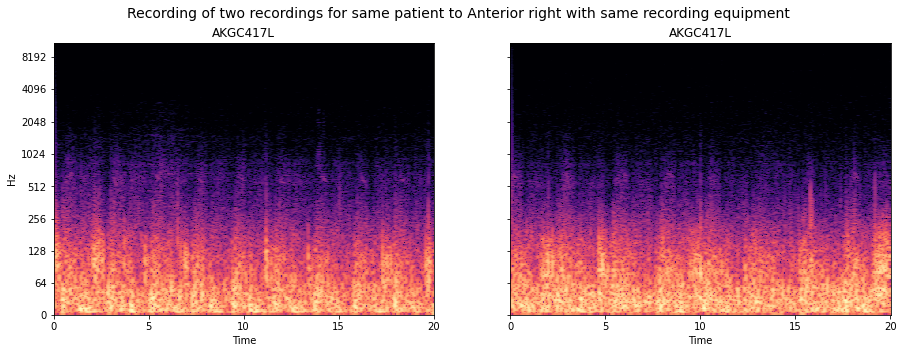

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(15, 5))

librosa.display.specshow(get_spectogram(f'{audio_path}/158_1p4_Ar_mc_AKGC417L.wav'),
                         y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='AKGC417L')
ax[0].label_outer()

librosa.display.specshow(get_spectogram(f'{audio_path}/158_1p2_Ar_mc_AKGC417L.wav'),
                         y_axis='log', x_axis='time', ax=ax[1])

ax[1].set(title='AKGC417L')
ax[1].label_outer();
plt.suptitle("Recording of two recordings for same patient to Anterior right with same recording equipment", fontsize=14);

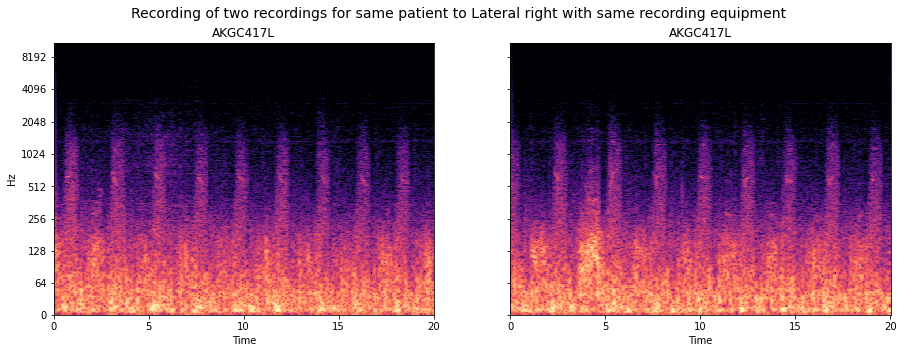

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(15, 5))

librosa.display.specshow(get_spectogram(f'{audio_path}/158_1p4_Lr_mc_AKGC417L.wav'),
                         y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='AKGC417L')
ax[0].label_outer()

librosa.display.specshow(get_spectogram(f'{audio_path}/158_1p3_Lr_mc_AKGC417L.wav'),
                         y_axis='log', x_axis='time', ax=ax[1])

ax[1].set(title='AKGC417L')
ax[1].label_outer();
plt.suptitle("Recording of two recordings for same patient to Lateral right with same recording equipment", fontsize=14);

In [ ]:
equipment_distribution_df


recording_equipment  count
0            AKGC417L    646
1            Litt3200     60
2            LittC2SE     87
3            Meditron    127
4     Meditron - Copy      1

In [ ]:
diagnosis_df.head()


patient_number diagnosis
0             101      URTI
1             102   Healthy
2             103    Asthma
3             104      COPD
4             105      URTI

In [ ]:
metadata_df.loc[(metadata_df['patient_number'] == 101) & (metadata_df['recording_equipment']=='Meditron')]

patient_number recording_index  ... recording_equipment               file_name
500             101             1b1  ...            Meditron  101_1b1_Pr_sc_Meditron
501             101             1b1  ...            Meditron  101_1b1_Al_sc_Meditron

[2 rows x 6 columns]

In [ ]:
def use_equipment(patient_number, equipment):
    df = metadata_df.loc[(metadata_df['patient_number'] == patient_number) & (metadata_df['recording_equipment']==equipment)]
    return 1 if df.shape[0] > 0 else 0

equipment = 'AKGC417L'
diagnosis_df['patient_number'].apply(lambda n: use_equipment(n, equipment))
use_equipment(101, 'Meditron')


1

In [ ]:
recording_equipments = equipment_distribution_df['recording_equipment'].values
for recording_equipment in recording_equipments:
    demographic_diagnosis_df[recording_equipment] = demographic_diagnosis_df['patient_number'].apply(lambda n: use_equipment(n, recording_equipment)).astype(int)

diagnosis_df = demographic_diagnosis_df
diagnosis_df.head()

patient_number    age sex  ...  LittC2SE  Meditron  Meditron - Copy
0             101   3.00   F  ...         0         1                1
1             102   0.75   F  ...         0         1                0
2             103  70.00   F  ...         1         0                0
3             104  70.00   F  ...         0         0                0
4             105   7.00   F  ...         0         1                0

[5 rows x 13 columns]

In [ ]:
diagnosis_AKGC417L = diagnosis_df.loc[diagnosis_df['AKGC417L'] == 1]['diagnosis'].unique()
diagnosis_Litt3200 = diagnosis_df.loc[diagnosis_df['Litt3200'] == 1]['diagnosis'].unique()
diagnosis_LittC2SE = diagnosis_df.loc[diagnosis_df['LittC2SE'] == 1]['diagnosis'].unique()
diagnosis_Meditron = diagnosis_df.loc[diagnosis_df['Meditron'] == 1]['diagnosis'].unique()

print(f'Results for AKGC417L: {diagnosis_AKGC417L}')
print(f'Results for Litt3200: {diagnosis_Litt3200}')
print(f'Results for LittC2SE: {diagnosis_LittC2SE}')
print(f'Results for Meditron: {diagnosis_Meditron}')
print(f'Diagnosis list: {diagnosis_df["diagnosis"].unique()}')

Results for AKGC417L: ['COPD']
Results for Litt3200: ['COPD']
Results for LittC2SE: ['Asthma' 'COPD' 'Pneumonia']
Results for Meditron: ['URTI' 'Healthy' 'LRTI' 'COPD' 'Bronchiectasis' 'Bronchiolitis'
 'Pneumonia']
Diagnosis list: ['URTI' 'Healthy' 'Asthma' 'COPD' 'LRTI' 'Bronchiectasis' 'Pneumonia'
 'Bronchiolitis']


In [ ]:
def plot_recordings(title, sample_df):
    rows = int(sample_df.shape[0]/3)
    fig_height = rows * 4
    fig, ax = plt.subplots(nrows=rows, ncols=3, sharex=True, sharey=True, figsize=(15, fig_height))
    n_col = 0
    for index, row in sample_df.iterrows():
        
        n_row = int(index/3)
        cell_title = f"{row['diagnosis']}, age_group: {row['age_group']}, sex: {row['sex']}, bmi: {row['adult_bmi']}\n child_weight: {row['child_weight']}, child_height: {row['child_height']}"
        librosa.display.specshow(get_spectogram(f"{audio_path}/{row['file_name']}.wav"),
                             y_axis='log', x_axis='time', ax=ax[n_row][n_col])
        ax[n_row][n_col].set(title=cell_title)
        ax[n_row][n_col].label_outer()
        n_col += 1
        if(n_col == 3):
            n_col = 0
        

    plt.suptitle(title, fontsize=14);

In [ ]:
def get_sample(sample_df):
    ids = sample_df['patient_number'].values
    metadata_ids = metadata_df.loc[
        (metadata_df['patient_number'].isin(ids))
    ][['patient_number']].drop_duplicates().index.values

    return pd.merge(sample_df, metadata_df.loc[metadata_ids][['patient_number', 'file_name']], on='patient_number')
    

    
diagnosis_df['diagnosis'].unique()

array(['URTI', 'Healthy', 'Asthma', 'COPD', 'LRTI', 'Bronchiectasis',
       'Pneumonia', 'Bronchiolitis'], dtype=object)

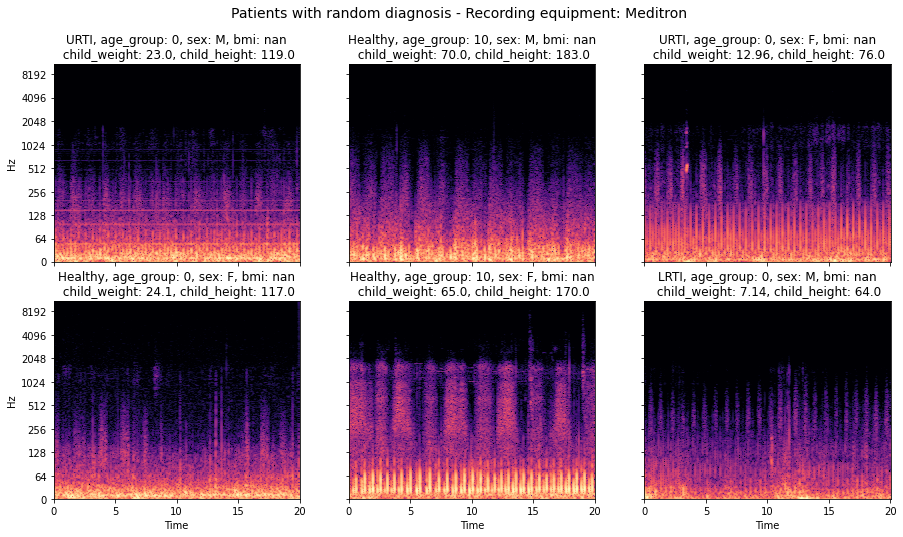

In [ ]:
sample_df = get_sample(diagnosis_df.loc[(diagnosis_df['Meditron'] == 1)].sample(6))

plot_recordings('Patients with random diagnosis - Recording equipment: Meditron', sample_df)

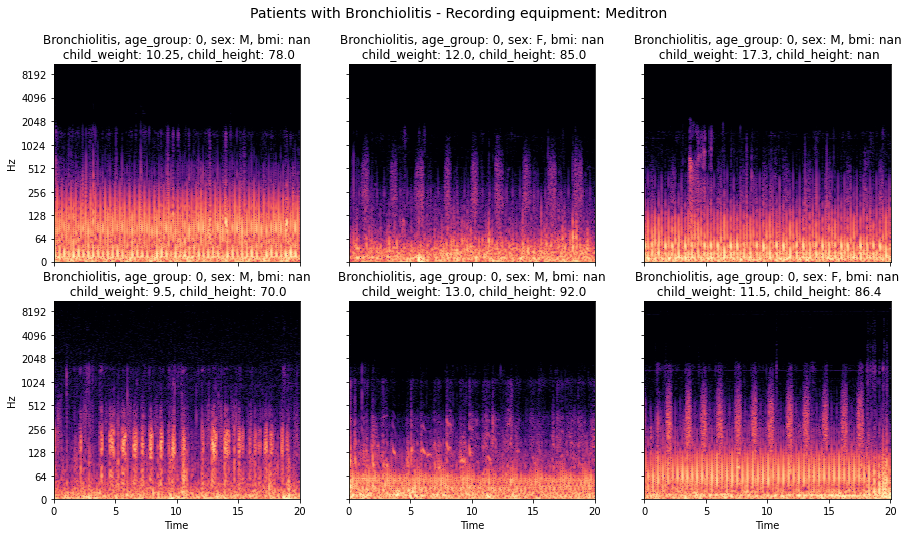

In [ ]:
sample_df = get_sample(diagnosis_df.loc[(diagnosis_df['Meditron'] == 1) & (diagnosis_df['diagnosis'] == 'Bronchiolitis')].sample(6))

plot_recordings('Patients with Bronchiolitis - Recording equipment: Meditron', sample_df)

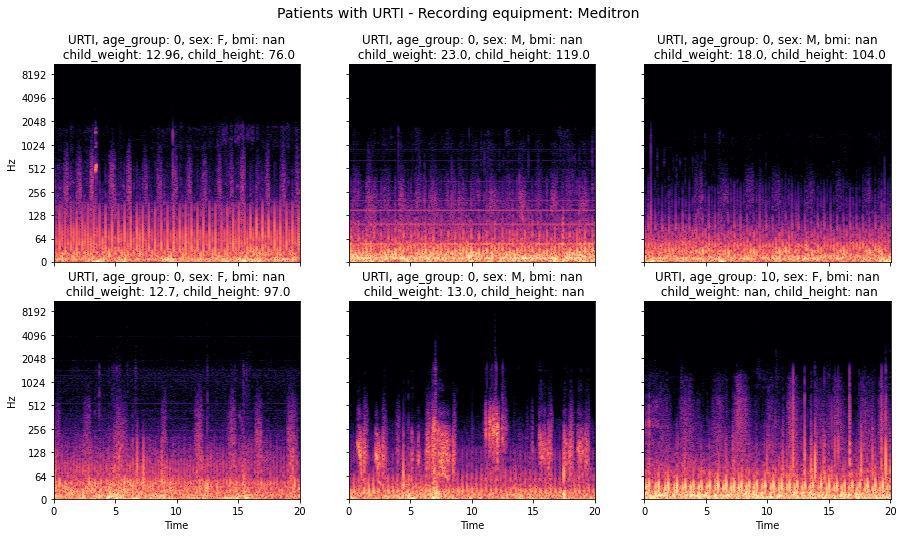

In [ ]:
sample_df = get_sample(diagnosis_df.loc[(diagnosis_df['Meditron'] == 1) & (diagnosis_df['diagnosis'] == 'URTI')].sample(6))
plot_recordings('Patients with URTI - Recording equipment: Meditron', sample_df)

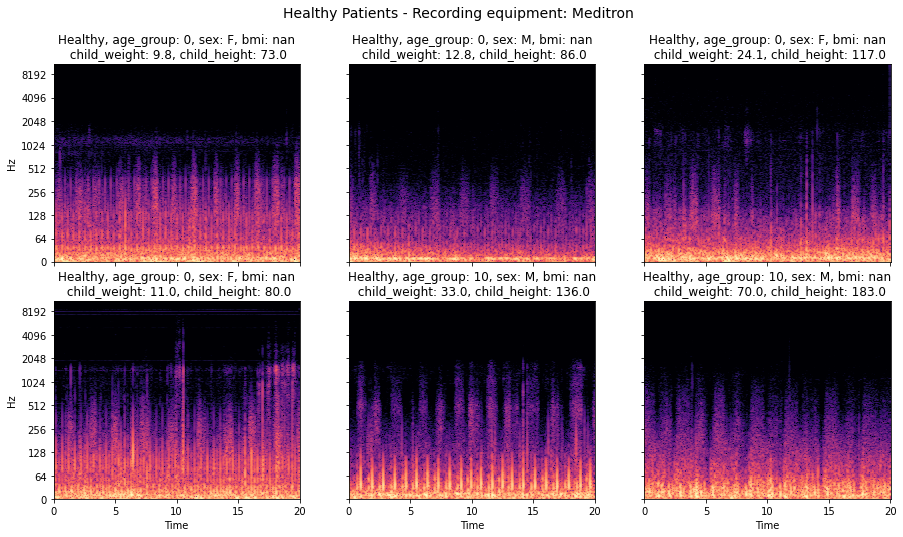

In [ ]:
sample_df = get_sample(diagnosis_df.loc[(diagnosis_df['Meditron'] == 1) & (diagnosis_df['diagnosis'] == 'Healthy')].sample(6))
plot_recordings('Healthy Patients - Recording equipment: Meditron', sample_df)

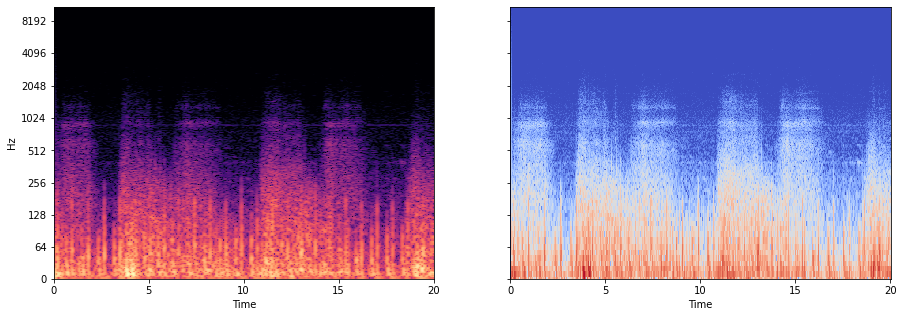

<Figure size 360x360 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(15, 5))

librosa.display.specshow(get_spectogram(audio_file), y_axis='log', x_axis='time', ax=ax[0])
ax[0].label_outer()

time_series, sample_rate = librosa.load(audio_file)
X = librosa.stft(time_series)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(5, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz', ax=ax[1])
    
ax[1].label_outer();
plt.suptitle("", fontsize=14);


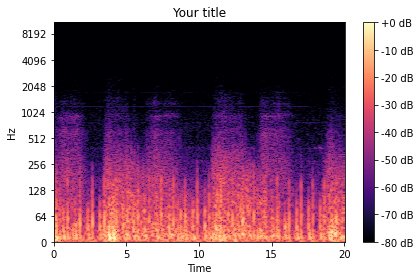

In [ ]:
librosa.display.specshow(get_spectogram(audio_file),
                         y_axis='log', x_axis='time')
plt.title('Your title')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()
